In [1]:
import sys
sys.path.append('/home/lumargot/ShapeAXI/src')

In [2]:
import os
import torch
from torch import nn
from pytorch3d.ops import sample_points_from_meshes
import numpy as np

import plotly.graph_objects as go
import plotly.express as px
from pytorch3d.vis.plotly_vis import plot_scene
from pytorch3d.structures import (
    Meshes,
    Pointclouds,)
    
import sys
sys.path.append('/home/lumargot/ShapeAXI/src')
import pandas as pd

from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.metrics import classification_report
import pandas as pd
from vtk.util.numpy_support import vtk_to_numpy
from sklearn.metrics import jaccard_score
import matplotlib.pyplot as plt 
import itertools



In [61]:
import numpy as np 
import torch
import torch.nn.functional as F
import torch.optim as optim
from typing import Tuple, Union

import pandas as pd

from pytorch3d.structures import (Meshes)

from pytorch3d.ops import (sample_points_from_meshes)

from shapeaxi.saxi_layers import *
from shapeaxi.saxi_nets import *

from lightning.pytorch.core import LightningModule
import monai.networks.nets as monai_nets

from shapeaxi.saxi_dataset import SaxiPCFBDataset, SaxiPCFBDataModule
from shapeaxi.saxi_transforms import RandomRotation
from shapeaxi.saxi_nets_lightning import SaxiHFBClassification, SaxiHilbertClassification

In [4]:
def plot_confusion_matrix(cm, classes,normalize=False,title='Confusion matrix',cmap=plt.cm.Blues):
    #This function prints and plots the confusion matrix. Normalization can be applied by setting `normalize=True`.
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix, avg:", np.trace(cm)/len(classes))
    else:
        print('Confusion matrix, without normalization')

    plt.imshow(cm, interpolation='nearest', cmap=cmap, aspect='auto')
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.3f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.xlabel('Predicted label')
    plt.ylabel('True label')
    plt.tight_layout()

    return cm


In [5]:
from torch.utils.data import Dataset, DataLoader
import lightning as L
from lightning.pytorch.core import LightningDataModule
from collections.abc import Callable
from tqdm import tqdm
import pytorch3d

In [6]:
csv_train="/CMF/data/lumargot/DCBIA/Combined/csv/condyles_4classes_consensus_Marcela_train_fold1_train_train.csv"
csv_valid="/CMF/data/lumargot/DCBIA/Combined/csv/condyles_4classes_consensus_Marcela_train_fold1_train_test.csv"
csv_test="/CMF/data/lumargot/DCBIA/Combined/csv/condyles_4classes_consensus_Marcela_train_fold1_test.csv"
mount_point="",
surf_column="hilbert_space",
# ckpt = '/CMF/data/lumargot/DCBIA/Combined/out/SaxiHilbert/test/epoch=59-val_loss=1.03.ckpt'
# ckpt ='/CMF/data/lumargot/DCBIA/Combined/out/SaxiHilbert/test/epoch=4-val_loss=1.42.ckpt'
# ckpt ='/CMF/data/lumargot/DCBIA/Combined/out/SaxiHilbert/test/epoch=27-val_loss=1.00.ckpt'
# ckpt = '/CMF/data/lumargot/DCBIA/Combined/out/SaxiHilbert/test/epoch=5-val_loss=1.48.ckpt'

# ckpt = '/CMF/data/lumargot/DCBIA/Combined/out/SaxiHilbert/fold0/epoch=5-val_loss=1.80.ckpt'
# ckpt = '/CMF/data/lumargot/DCBIA/Combined/out/SaxiHilbert/fold1/epoch=13-val_loss=1.42.ckpt'
# ckpt = '/CMF/data/lumargot/DCBIA/Combined/out/SaxiHilbert/fold2/epoch=10-val_loss=1.35.ckpt'
# ckpt = '/CMF/data/lumargot/DCBIA/Combined/out/SaxiHilbert/fold4/epoch=10-val_loss=1.35.ckpt'


ckpt = '/CMF/data/lumargot/DCBIA/Combined/out/SaxiHilbert/fold1/last.ckpt'

In [62]:
ckpt = '/CMF/data/lumargot/DCBIA/Combined/out/SaxiHilbert/pc/epoch=12-val_loss=1.38.ckpt'
# model = SaxiHFBClassification(**hparams)
# model = SaxiHFBClassification.load_from_checkpoint(ckpt)
model = SaxiHilbertClassification.load_from_checkpoint(ckpt)
model.cuda()
model.eval()

/home/lumargot/ShapeAXI/src/shapeaxi/saxi_nets.py:886: UserWarning:

To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).



SaxiHilbertClassification(
  (encoder): ConvNeXt(
    (stem): Sequential(
      (0): Conv2d(3, 96, kernel_size=(4, 4), stride=(4, 4))
      (1): LayerNorm2d((96,), eps=1e-06, elementwise_affine=True)
    )
    (stages): Sequential(
      (0): ConvNeXtStage(
        (downsample): Identity()
        (blocks): Sequential(
          (0): ConvNeXtBlock(
            (conv_dw): Conv2d(96, 96, kernel_size=(7, 7), stride=(1, 1), padding=(3, 3), groups=96)
            (norm): LayerNorm((96,), eps=1e-06, elementwise_affine=True)
            (mlp): Mlp(
              (fc1): Linear(in_features=96, out_features=384, bias=True)
              (act): GELU()
              (drop1): Dropout(p=0.0, inplace=False)
              (norm): Identity()
              (fc2): Linear(in_features=384, out_features=96, bias=True)
              (drop2): Dropout(p=0.0, inplace=False)
            )
            (shortcut): Identity()
            (drop_path): Identity()
          )
          (1): ConvNeXtBlock(
            

In [8]:
from shapeaxi.saxi_transforms import EvalTransform
from shapeaxi.saxi_dataset import SaxiPCDataModule

In [59]:
batch_size = 1
surf_scale = 0.0609600900973719
surf_scale=0.0609600900973719

# input_csv = "/CMF/data/lumargot/DCBIA/Combined/csv/condyles_4classes_consensus_Marcela.csv"
dm = SaxiPCDataModule(csv_train=csv_train, csv_valid=csv_valid, csv_test=csv_test, mount_point="", 
                        surf_column='hilbert_space', class_column='class_consensus', 
                        train_transform = EvalTransform(scale_factor=0.0609600900973719), 
                        valid_transform = EvalTransform(scale_factor=0.0609600900973719),
                        test_transform = EvalTransform(scale_factor=0.0609600900973719),
                        batch_size=batch_size,color_normals=1,num_workers=1, drop_last=True,
                        )
dm.setup()
train_loader = dm.train_dataloader()
train_loader = dm.test_dataloader()

train_ds = dm.test_ds

In [ ]:
# batch_size = 1
# surf_scale = 0.0609600900973719
# surf_scale=0.0609600900973719

# # input_csv = "/CMF/data/lumargot/DCBIA/Combined/csv/condyles_4classes_consensus_Marcela.csv"
# dm = SaxiPCFBDataModule(csv_train=csv_train, csv_valid=csv_valid, csv_test=csv_test, mount_point="", surf_column = 'surf', 
#                         pc_column='hilbert_space', class_column='class_consensus', 
#                         train_transform = EvalTransform(scale_factor=0.0609600900973719), 
#                         valid_transform = EvalTransform(scale_factor=0.0609600900973719),
#                         test_transform = EvalTransform(scale_factor=0.0609600900973719),
#                         batch_size=batch_size,color_normals=1,num_workers=1, drop_last=True,
#                         )
# dm.setup()
# train_loader = dm.train_dataloader()
# train_loader = dm.test_dataloader()

# train_ds = dm.test_ds

In [60]:
softmax = nn.Softmax(dim=1)

In [69]:
X.shape

torch.Size([1, 16384, 3])

In [ ]:
output = []
for idx,batch in tqdm(enumerate(train_loader), total=len(train_loader)):
  # batch_cuda = []
  # for elt in batch:
  #   batch_cuda.append(elt.cuda())

  X, Y = batch

  X, _ = model.sorter(X.cuda())
  X = X.view(-1, 3, 128,128)
  mean = X.mean(dim=(2, 3), keepdim=True)
  std = X.std(dim=(2, 3), keepdim=True) + 1e-8
  X = (X - mean) / std

  
  X_hat = model(X)

  predictions = torch.argmax(X_hat, dim=1)
  prob = softmax(X_hat).detach()
  print(predictions.item(), Y.item())
  # output.append([predictions,Y, prob])


In [ ]:
output

In [ ]:
# output = []
# for idx,batch in tqdm(enumerate(train_loader), total=len(train_loader)):
#   batch_cuda = []
#   for elt in batch:
#     batch_cuda.append(elt.cuda())

#   X, V,F,CN, Y = batch_cuda
#   X_mesh = model.create_mesh(V, F, CN)
#   X_views, X_PF = model.render(X_mesh)

#   X_pc = model.create_hilbert_representation(X)
  
#   X_hat = model(X_pc, X_views)
#   # return X_hat

#   predictions = torch.argmax(X_hat, dim=1)
#   prob = softmax(X_hat).detach()
#   output.append([predictions,Y, prob])


100%|██████████| 62/62 [02:01<00:00,  1.96s/it]


In [81]:
# probs = model.output
all_pred = []
all_gt = []

for prob in output:
  pred, gt, score = prob
  max_score = torch.max(score).item()
  all_gt.append(gt.cpu().detach().numpy())
  all_pred.append(pred.cpu().detach().numpy())

all_gt = np.array(all_gt)
all_pred = np.array(all_pred)

              precision    recall  f1-score   support

           0       0.27      1.00      0.43        17
           1       1.00      0.00      0.00        17
           2       1.00      0.00      0.00        12
           3       1.00      0.00      0.00        16

    accuracy                           0.27        62
   macro avg       0.82      0.25      0.11        62
weighted avg       0.80      0.27      0.12        62

Confusion matrix, without normalization


/tmp/ipykernel_966727/1577672534.py:13: MatplotlibDeprecationWarning:

Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.



Normalized confusion matrix, avg: 0.25


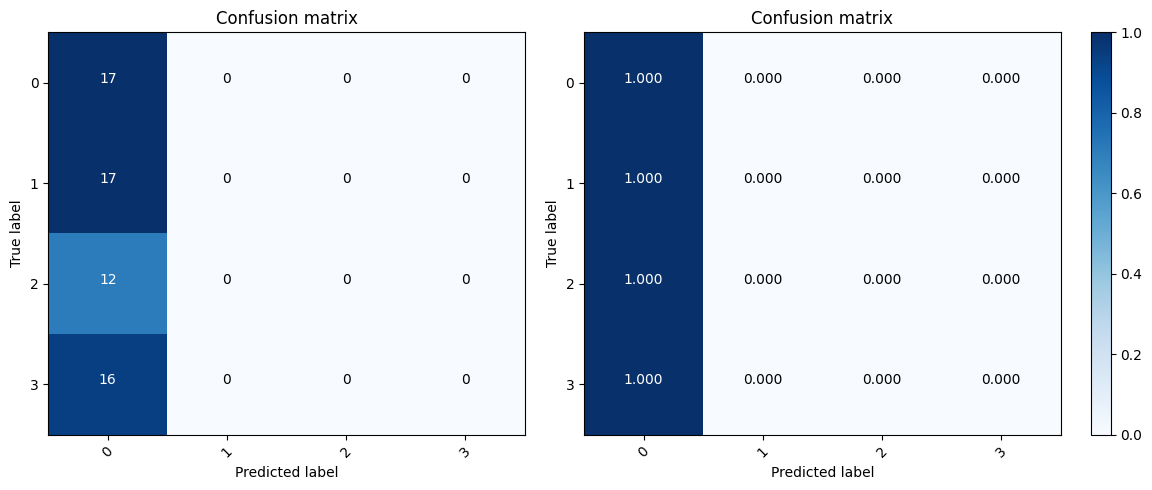

In [82]:
df_pred = pd.DataFrame(data={'gt':all_gt[:,0], 'pred':all_pred[:,0]})
classes = np.array([0,1,2,3])

report = classification_report(df_pred['gt'], df_pred['pred'], output_dict=False, zero_division=1)
print(report)

cnf_matrix = confusion_matrix(df_pred['gt'], df_pred['pred'])
np.set_printoptions(precision=3)

fig = plt.figure(figsize=(12,5))
plt.subplot(121)
plot_confusion_matrix(cnf_matrix, classes)
plt.subplot(122)# Plot normalized confusion matrix
plot_confusion_matrix(cnf_matrix, classes, normalize=True)
plt.show()